In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# INTRODUCTION

In this section, we will present our procedure to identify the major events related to climate change that took place during the scope of our study.
To simplify our presentation we will focus on the year 2020 but this procedure will be extended to the entire data set later on.
The objective is to identify the date of these events by determining the days where the number of citations related to climate change is the most important.
We have therefore built a preliminary lexicon containing the terms most frequently used by speakers commenting about the climate emergency ( such as "climate change", "COP26",...)
This lexicon is a first draft and will be improved later by a more precise method involving a larger lexicon or a more advanced selection method.
With this lexicon we can filter our data and create a dataframe containing only the climate-related quotations for each year and this reduced dataframes will be used throughout our study.
Every dataframes and methodology to construct them can be found in notebook "Playground"

In this notebook we use only the dataframe for the year 2020

After building these dataframe, we can identify the days where the number of quotes related to climate is the most important.
Finally, we can identify the most frequently used words by the speakers and thus try to determine if a significant event took place on the day of this peak in the number of quotations



### LOADING DATA SET FOR THE YEAR 2020

In [2]:
quotes_2020 = pd.io.json.read_json('quotes-2020_climate.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [3]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,nationality,gender,ethnic_group,occupation,party,religion,date_of_birth,month
0,2020-02-27-004325,And it's also in the context of decades of utt...,None,[],2020-02-27 15:17:36,1,"[[None, 0.8786], [Bernie Sanders, 0.1214]]",[http://www.eenews.net/stories/1062457547],E,Thursday,None,None,None,None,None,None,NaN,Feb
1,2020-01-29-062975,Many make the link today between their experie...,Peter Maurer,"[Q117796, Q42426597]",2020-01-29 09:04:36,5,"[[Peter Maurer, 0.8787], [None, 0.1213]]",[http://whbl.com/news/articles/2020/jan/29/hun...,E,Wednesday,None,None,None,None,None,None,NaN,Jan
2,2020-02-10-076321,the National Energy and Climate Plans are how ...,Kadri Simson,[Q13570003],2020-02-10 05:51:51,1,"[[Kadri Simson, 0.9269], [None, 0.0504], [Gret...",[https://www.politico.eu/newsletter/brussels-p...,E,Monday,Estonia,female,None,politician,Estonian Centre Party,None,+1977-01-22T00:00:00Z,Feb
3,2020-01-06-069057,"This budget also allows us to earmark £ 500,00...",John Whitehead,"[Q55436000, Q58150131, Q6263827, Q6263833, Q62...",2020-01-06 11:49:00,1,"[[John Whitehead, 0.7971], [None, 0.2029]]",[https://www.buryfreepress.co.uk/news/draft-bu...,E,Monday,None,None,None,None,None,None,NaN,Jan
4,2020-03-10-005294,"As a state, we will pursue every option availa...",Kate Brown,"[Q16727692, Q6375399]",2020-03-10 20:47:28,2,"[[Kate Brown, 0.7275], [None, 0.2726]]",[http://www.courthousenews.com/oregon-governor...,E,Tuesday,None,None,None,None,None,None,NaN,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,2020-02-05-114487,We will be an energetic champion of free trade...,Dominic Raab,[Q268584],2020-02-05 16:30:31,2,"[[Dominic Raab, 0.8813], [None, 0.0998], [Geor...",[http://forbesadvocate.com.au/story/6616761/au...,E,Wednesday,United Kingdom,male,None,"[politician, lawyer]",Conservative Party,None,+1974-02-25T00:00:00Z,Feb
10222,2020-02-21-007763,Both urgent and long-term actions are needed t...,None,[],2020-02-21 20:23:47,1,"[[None, 0.7482], [Greta Thunberg, 0.2518]]",[http://feeds.inquisitr.com/~r/google/yDYq/~3/...,E,Friday,None,None,None,None,None,None,NaN,Feb
10223,2020-04-10-020959,If we re-elect Donald Trump because we have tu...,None,[],2020-04-10 00:00:00,1,"[[None, 0.5234], [Mike Doyle, 0.4509], [Jim Bu...",[http://wesa.fm/post/mike-doyle-face-progressi...,E,Friday,None,None,None,None,None,None,NaN,Apr
10224,2020-02-10-057505,"Obama got health care, Trump got his tax cut, ...",Tom Steyer,[Q16189531],2020-02-10 11:00:08,1,"[[Tom Steyer, 0.8143], [None, 0.1857]]",[https://thebulletin.org/2020/02/on-the-new-ha...,E,Monday,United States of America,male,None,"[businessperson, organizational founder, phila...",Democratic Party,None,+1957-06-27T00:00:00Z,Feb


In [4]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [5]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(5)

date
2020-01-14    248
2020-01-15    228
2020-01-21    221
2020-02-06    219
2020-02-07    213
Name: date, dtype: int64

### We then select  the quotations reported on peak days 

In [6]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]

## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

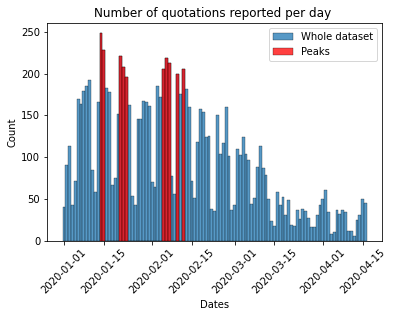

In [7]:
sns.histplot(quotes_2020['date'], bins = len(quotes_date_occurence), label = "Whole dataset")
sns.histplot(quotations_peak['date'], color = 'red', label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()
plt.title('Number of quotations reported per day ')


## Plot of the quotations reported per month

Text(-2.700000000000003, 0.5, 'Count')

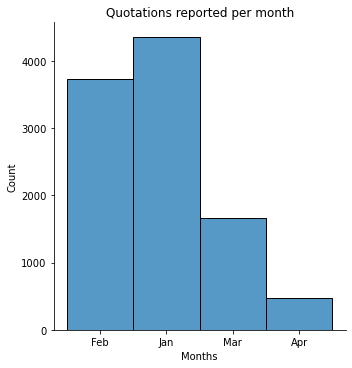

In [8]:
sns.displot(quotes_2020['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

##  Identification of  the most frequently used words by the speakers when the peak occured

The goal here is to observe the most frequent words, and see if we can establish a link to a particular event.


## First we will look at the frequency of  words starting with a capital letter 

We do this in order to to find more easily the countries where these major events occured or the names of some  people.
These words can be very useful keywords.

In [9]:
key_capital_words = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, capital_words = capital_letter_keywords(quotes_2020, d)
    key_capital_words.append(capital_words)


 We show in the following dataframe, the most frequent keywords starting with a capital letter for the 10 days where quotations on climate change were predominant.

In [10]:
top_ten_day_key_words_capital = pd.DataFrame(key_capital_words, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_key_words_capital

,Australia,BlackRock,Minister,Canada,UK,Government,Michaels,COP26,BP,Glasgow,Scottish,Greta,Britain,Trump
date,,,,,,,,,,,,,,
2020-01-14,21.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,0.0,0.0,0.0,0.0,14.0,8.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0
2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,7.0,0.0


Next we look at the frequency of all words.

 This time, we show in the following dataframe, the most frequent keywords for the 10 days where quotations on climate change were predominant.

In [11]:
keywords = []
top_ten_days = quotes_date_occurence.index[:10].astype(str)
for d in top_ten_days:
    _, words = all_keywords(quotes_2020, d)
    keywords.append(words)

In [12]:
top_ten_day_keywords = pd.DataFrame(keywords, index = quotes_date_occurence.index[:10]).fillna(0)
top_ten_day_keywords

,people,Australia,need,around,fire,impacts,country,much,emergency,energy,...,COP26,communities,already,health,life,would,year,nuclear,state,political
date,,,,,,,,,,,,,,,,,,,,,
2020-01-14,26.0,21.0,17.0,16.0,15.0,15.0,14.0,14.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-15,21.0,13.0,14.0,12.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,22.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-06,15.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-07,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,21.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-05,18.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12,18.0,0.0,33.0,0.0,0.0,0.0,11.0,0.0,15.0,25.0,...,12.0,12.0,11.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
2020-02-10,26.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0


From the different results, we see that "Australia" and "fire" are amidst the most frequent words
on the 14th of January.

This indicates that the event that "boosted" the number of quotes about the climate during this time is probably the big australian wildfires that began at the end of 2019. We should explore this option now.


##  We therefore explore what happened on the 14th of  january...

The most important peak occured on the 14th of January. 

We will then, try to determine if a particular event occured.

In [13]:
filtered_sentence_df_australia,count_capital_keywords_australia =  capital_letter_keywords(
    quotes_2020, '2020-01-14')
_,count_keywords_australia = all_keywords(quotes_2020, '2020-01-14' )


In [14]:
count_capital_keywords_australia

Australia    21
BlackRock    11
dtype: int64

In [15]:
count_keywords_australia 

people       26
Australia    21
need         17
around       16
fire         15
impacts      15
country      14
much         14
emergency    13
energy       13
address      13
economy      13
dtype: int64

From these previous results, evidences accumulate on the nature of this peak. In order to validate it with a manual manipulation, we try to look for the word "bushfire" on this date here below. We observe 14 occurences. This is way too specific to be a coincidence.

In [16]:
filtered_sentence_df_australia.str.contains('bushfire').sum()

14

This link from this precise period validates our expectation : https://edition.cnn.com/2020/01/01/australia/australia-fires-explainer-intl-hnk-scli/index.html

In [17]:

 

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Other NLP
import re
import spacy

from nltk.corpus import stopwords

# General Plotting
import matplotlib.pyplot as plt
 
import seaborn as sns


# Special Plotting
import pyLDAvis
import pyLDAvis.gensim_models 

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of rows displayed by pandas
pd.options.display.max_rows = 1000

# Set some CONSTANTS that will be used later
SEED    = 41  # base to generate a random number


### Australia

In [18]:
australia = quotations_peak[quotations_peak.date.astype(str) =='2020-01-14']

In [19]:
! python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [20]:
spacy.load('en_core_web_sm')

In [21]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [23]:
australia['quotation'] = australia['quotation'].apply(lambda x : preprocess(x))

In [24]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [26]:
australia['quotation'] = australia['quotation'].apply(lambda x : lemmatize_text(x))



In [27]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(australia['quotation'])



In [28]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 10, no_above=0.1, keep_n= 200)

## Gensim doc2bow

In [29]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in australia['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(15, 1), (22, 1)]

## Result for the document 12

In [30]:
bow_doc_12 = bow_corpus[12]
print("Result for the document 12\n") 
for i in range(len(bow_doc_12)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_12[i][0], 
                                               dictionary[bow_doc_12[i][0]], bow_doc_12[i][1]))


Result for the document 12

Word 15 ("need") appears 1 time.
Word 22 ("weather") appears 1 time.


In [31]:
#lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes = 2)

### LDA model

In [32]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [33]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.057*"economy" + 0.048*"impact" + 0.046*"environmental" + 0.045*"one" + 0.045*"threat" + 0.043*"u" + 0.041*"how" + 0.041*"issue" + 0.037*"need" + 0.034*"address"
Topic: 1 
Words: 0.108*"ha" + 0.053*"wa" + 0.039*"around" + 0.039*"if" + 0.035*"country" + 0.031*"now" + 0.031*"you" + 0.030*"company" + 0.029*"at" + 0.029*"fire"
Topic: 2 
Words: 0.093*"australia" + 0.074*"around" + 0.074*"one" + 0.067*"country" + 0.064*"all" + 0.051*"issue" + 0.046*"time" + 0.036*"how" + 0.036*"their" + 0.035*"new"
Topic: 3 
Words: 0.073*"at" + 0.051*"australia" + 0.047*"take" + 0.046*"address" + 0.045*"impact" + 0.045*"been" + 0.041*"who" + 0.037*"business" + 0.034*"new" + 0.033*"work"
Topic: 4 
Words: 0.073*"if" + 0.073*"now" + 0.060*"these" + 0.053*"long" + 0.047*"impact" + 0.043*"don" + 0.042*"much" + 0.037*"more" + 0.037*"government" + 0.034*"term"
Topic: 5 
Words: 0.087*"fire" + 0.062*"weather" + 0.058*"doe" + 0.054*"ha" + 0.047*"now" + 0.044*"risk" + 0.041*"even" + 0.037*"only" + 0.0

In [34]:
cm = CoherenceModel(model=lda_model, texts = australia['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.3019579617601354


In [35]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.086593  0.010691       1        1  14.309574
0      0.116689  0.052698       2        1  13.386159
4     -0.095527 -0.087834       3        1  10.545486
1     -0.072457  0.009129       4        1  10.211446
6     -0.065974 -0.106469       5        1  10.049768
8      0.020931 -0.119400       6        1   9.145980
5     -0.150077  0.095840       7        1   8.583427
3      0.131974  0.027286       8        1   8.414788
9      0.021487  0.176469       9        1   8.290101
2      0.179545 -0.058408      10        1   7.063271, topic_info=             Term       Freq      Total Category  logprob  loglift
35           risk  20.000000  20.000000  Default  30.0000  30.0000
10            you  22.000000  22.000000  Default  29.0000  29.0000
71             ha  25.000000  25.000000  Default  28.0000  28.0000
20           fire  24.000000  24.000000  Default  27.0000  27.0000
11      australia  22.000000  22.000000  Default  26.0000  26.0000
51           more  30.000000  30.000000  Default  25.0000  25.0000
0             now  18.000000  18.000000  Default  24.0000  24.0000
36        country  14.000000  14.000000  Default  23.0000  23.0000
7          around  17.000000  17.000000  Default  22.0000  22.0000
39         impact  24.000000  24.000000  Default  21.0000  21.0000
41            one  21.000000  21.000000  Default  20.0000  20.0000
37             if  21.000000  21.000000  Default  19.0000  19.0000
45            doe  13.000000  13.000000  Default  18.0000  18.0000
33             at  17.000000  17.000000  Default  17.0000  17.0000
9           there  21.000000  21.000000  Default  16.0000  16.0000
12          issue  16.000000  16.000000  Default  15.0000  15.0000
19            all  22.000000  22.000000  Default  14.0000  14.0000
47             so  21.000000  21.000000  Default  13.0000  13.0000
44        economy  11.000000  11.000000  Default  12.0000  12.0000
55             wa  16.000000  16.000000  Default  11.0000  11.0000
4             how  22.000000  22.000000  Default  10.0000  10.0000
21             or  16.000000  16.000000  Default   9.0000   9.0000
17              u  19.000000  19.000000  Default   8.0000   8.0000
22        weather  11.000000  11.000000  Default   7.0000   7.0000
14        address  13.000000  13.000000  Default   6.0000   6.0000
50           been  14.000000  14.000000  Default   5.0000   5.0000
40           long  11.000000  11.000000  Default   4.0000   4.0000
2       emergency  13.000000  13.000000  Default   3.0000   3.0000
29          which  14.000000  14.000000  Default   2.0000   2.0000
27           know  12.000000  12.000000  Default   1.0000   1.0000
51           more  17.773965  30.952564   Topic1  -2.1982   1.3895
2       emergency   7.666364  13.442578   Topic1  -3.0391   1.3827
57           than   7.197563  13.891421   Topic1  -3.1022   1.2867
9           there   8.706771  21.352823   Topic1  -2.9118   1.0472
43            out   5.087276  12.507297   Topic1  -3.4492   1.0447
17              u   7.782441  19.762129   Topic1  -3.0241   1.0123
20           fire   9.516074  24.315830   Topic1  -2.8230   1.0061
50           been   5.486080  14.521972   Topic1  -3.3737   0.9708
53           just   4.191076  11.838331   Topic1  -3.6430   0.9059
48        already   3.190131  10.445267   Topic1  -3.9159   0.7582
27           know   3.604836  12.084648   Topic1  -3.7937   0.7346
49        because   3.711200  12.621550   Topic1  -3.7646   0.7202
18           very   4.943044  16.941529   Topic1  -3.4780   0.7125
56           like   3.215870  11.309253   Topic1  -3.9079   0.6867
23        company   3.604803  14.823660   Topic1  -3.7937   0.5303
6            year   4.332284  18.339130   Topic1  -3.6099   0.5013
28           what   4.816693  20.447062   Topic1  -3.5039   0.4985
61          would   2.257704   9.966803   Topic1  -4.2616   0.4593
65           term   2.4136

### COP 26

In [36]:
cop = quotations_peak[quotations_peak.date.astype(str) =='2020-02-12']

In [37]:
def preprocess(txt):
    txt = " ".join(simple_preprocess(txt))
    
    
    
    return txt


In [38]:
cop['quotation'] = cop['quotation'].apply(lambda x : preprocess(x))

In [39]:

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/adrien/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
def lemmatize_text(txt):
    word_tokens = word_tokenize(txt)
    lemmatized_output = [WordNetLemmatizer().lemmatize(w) for w in word_tokens ]
    
    
    return lemmatized_output

In [41]:
cop['quotation'] = cop['quotation'].apply(lambda x : lemmatize_text(x))







In [42]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

dictionary = corpora.Dictionary(cop['quotation'])



In [43]:
#Filter out tokens that appear in
#less than 15 documents (absolute number) or
#more than 0.5 documents (fraction of total corpus size, not absolute number).
#after the above two steps, keep only the first 100000 most frequent tokens.

dictionary.filter_extremes(no_below = 5, no_above=0.2, keep_n= 200)

## Gensim doc2bow

In [44]:
#For each document we create a dictionary reporting how many
#words and how many times those words appear. Save this to ‘bow_corpus’, 
#then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(q) for q in cop['quotation']]
bow_corpus[12] #(token id, token count for document 12)

[(18, 1), (51, 1), (92, 1), (93, 1), (94, 1), (95, 1)]

## Result for the document 12

In [45]:
bow_doc_12 = bow_corpus[12]
print("Result for the document 12\n") 
for i in range(len(bow_doc_12)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_12[i][0], 
                                               dictionary[bow_doc_12[i][0]], bow_doc_12[i][1]))


Result for the document 12

Word 18 ("issue") appears 1 time.
Word 51 ("fight") appears 1 time.
Word 92 ("care") appears 1 time.
Word 93 ("health") appears 1 time.
Word 94 ("like") appears 1 time.
Word 95 ("taking") appears 1 time.


In [46]:
#lda_model = gensim.models.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes = 2)

### LDA model

In [47]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics= 10, id2word=dictionary, passes=2, workers = 2)

 ## Visualization of the top keywwords for each model (topics)

In [48]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.031*"energy" + 0.028*"policy" + 0.023*"up" + 0.022*"from" + 0.022*"one" + 0.021*"most" + 0.020*"warming" + 0.020*"global" + 0.019*"their" + 0.019*"they"
Topic: 1 
Words: 0.028*"have" + 0.025*"by" + 0.025*"will" + 0.021*"but" + 0.019*"need" + 0.018*"problem" + 0.017*"about" + 0.017*"u" + 0.016*"real" + 0.016*"now"
Topic: 2 
Words: 0.029*"my" + 0.026*"what" + 0.024*"more" + 0.022*"need" + 0.021*"when" + 0.020*"environmental" + 0.018*"about" + 0.018*"life" + 0.017*"come" + 0.017*"against"
Topic: 3 
Words: 0.038*"have" + 0.033*"about" + 0.028*"this" + 0.025*"been" + 0.025*"energy" + 0.025*"state" + 0.024*"do" + 0.020*"there" + 0.020*"will" + 0.019*"year"
Topic: 4 
Words: 0.030*"have" + 0.028*"they" + 0.024*"global" + 0.023*"can" + 0.022*"not" + 0.019*"issue" + 0.017*"more" + 0.017*"these" + 0.017*"than" + 0.016*"warming"
Topic: 5 
Words: 0.043*"this" + 0.031*"year" + 0.031*"way" + 0.025*"an" + 0.025*"ha" + 0.022*"there" + 0.022*"need" + 0.020*"wa" + 0.020*"you" + 0.019*"

In [49]:
cm = CoherenceModel(model=lda_model, texts = cop['quotation'], dictionary = dictionary, coherence = 'c_v')
coherence = cm.get_coherence()  # get coherence value
print("The average coherence score for all the topics is ",coherence)

The average coherence score for all the topics is  0.2955907753022333


In [50]:
# Visualize topics-keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.026429  0.023592       1        1  15.606962
4     -0.023678  0.026990       2        1  14.520381
6      0.109010  0.067566       3        1  12.552664
5      0.033932 -0.042894       4        1  12.143365
7      0.073498  0.095859       5        1  10.272389
3      0.087724 -0.082919       6        1   9.068460
0     -0.003310  0.015849       7        1   8.596491
9     -0.019775 -0.098183       8        1   7.463605
2     -0.073334 -0.085782       9        1   6.983200
8     -0.157639  0.079921      10        1   2.792482, topic_info=              Term       Freq      Total Category  logprob  loglift
60            year  20.000000  20.000000  Default  30.0000  30.0000
15          energy  28.000000  28.000000  Default  29.0000  29.0000
51           fight  10.000000  10.000000  Default  28.0000  28.0000
3              not  28.000000  28.000000  Default  27.0000  27.0000
102           help  11.000000  11.000000  Default  26.0000  26.0000
23             one  13.000000  13.000000  Default  25.0000  25.0000
64      government  22.000000  22.000000  Default  24.0000  24.0000
29           these  20.000000  20.000000  Default  23.0000  23.0000
30            this  56.000000  56.000000  Default  22.0000  22.0000
160             so  17.000000  17.000000  Default  21.0000  21.0000
127          state  14.000000  14.000000  Default  20.0000  20.0000
58            have  38.000000  38.000000  Default  19.0000  19.0000
39              uk  14.000000  14.000000  Default  18.0000  18.0000
44              my  14.000000  14.000000  Default  17.0000  17.0000
53              at  17.000000  17.000000  Default  16.0000  16.0000
31              up   9.000000   9.000000  Default  15.0000  15.0000
117      president   6.000000   6.000000  Default  14.0000  14.0000
120          about  28.000000  28.000000  Default  13.0000  13.0000
163           real  10.000000  10.000000  Default  12.0000  12.0000
59             way  18.000000  18.000000  Default  11.0000  11.0000
52            mean   9.000000   9.000000  Default  10.0000  10.0000
12              by  36.000000  36.000000  Default   9.0000   9.0000
25             put   7.000000   7.000000  Default   8.0000   8.0000
62             cop  13.000000  13.000000  Default   7.0000   7.0000
138  environmental  13.000000  13.000000  Default   6.0000   6.0000
109           when  11.000000  11.000000  Default   5.0000   5.0000
4           policy  17.000000  17.000000  Default   4.0000   4.0000
134           what  16.000000  16.000000  Default   3.0000   3.0000
32              wa  15.000000  15.000000  Default   2.0000   2.0000
66            make  13.000000  13.000000  Default   1.0000   1.0000
1             city   3.595382   6.317800   Topic1  -4.6195   1.2937
163           real   5.819787  10.729482   Topic1  -4.1379   1.2457
181        problem   6.582228  12.505172   Topic1  -4.0148   1.2157
135            any   3.708974   7.125719   Topic1  -4.5884   1.2045
184       solution   3.595368   7.191262   Topic1  -4.6195   1.1642
176           them   3.528341   7.060488   Topic1  -4.6383   1.1638
194         planet   5.001434  10.025710   Topic1  -4.2894   1.1620
92            care   3.102947   6.244439   Topic1  -4.7668   1.1581
173         public   4.445875   9.004203   Topic1  -4.4072   1.1517
197            see   2.863904   6.297634   Topic1  -4.8470   1.0695
14          effort   2.407266   5.483228   Topic1  -5.0207   1.0343
121     addressing   2.718481   6.369043   Topic1  -4.8991   1.0061
124           part   4.273217  10.069223   Topic1  -4.4468   1.0003
5            think   4.359159  11.605266   Topic1  -4.4269   0.8783
90            some   2.718466   7.269430   Topic1  -4.8991   0.8738
118            who   3.483217   9.751931   Topic1  -4.6512   0.8279
131         impact   4.856338  13.687448   Topic1  -4.3189   0.8213
4           policy   5.809564  17.138577   To